<h2> we are going to build K-means Clustering,Agglomerative Hierarchical Clustering, Density-based spatial clustering of applications with noise (DBSCAN) models.</h2>

<h1>K-Means Clustering</h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


<h2>Import Dataset</h2>

In [2]:
df = pd.read_csv("../input/mall-customers/Mall_Customers.csv")

In [3]:
X = df.iloc[:,[3,4]].values

<h2>Using the elbow method to find the optimal number of clusters</h2>

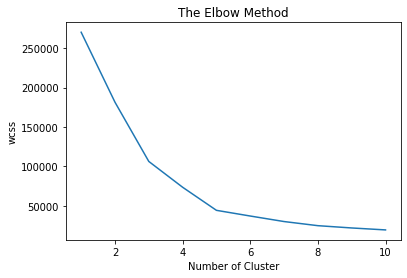

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init ='k-means++',random_state=211)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state=211)
y_means = kmeans.fit_predict(X)

<h2>Visualizing The Cluster</h2>

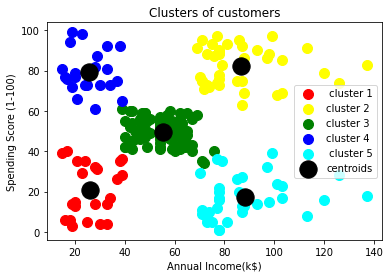

In [6]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label = ' cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s=100,c='yellow',label='cluster 2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label = 'cluster 3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s=100,c = 'blue',label = 'cluster 4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=100,c='cyan',label = ' cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<h1>2. Agglomerative Hierarchical Clustering</h2>

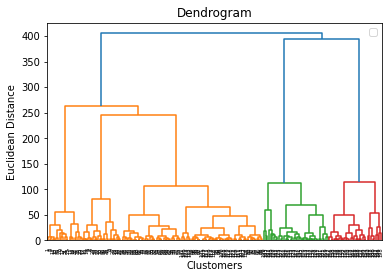

In [7]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clustomers')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()

<h1>Training the Hierarchical Clustering model on the dataset</h1>

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)


<h2>Visualising the clusters</h2>


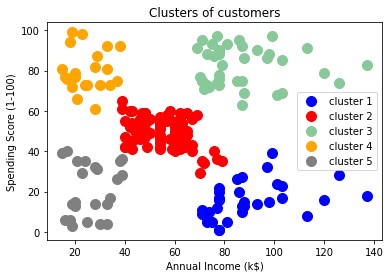

In [9]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1],s=100,c='blue',label='cluster 1')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1],s=100,c='red',label='cluster 2')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1],s=100,c='#88c999',label='cluster 3')
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1],s=100,c='orange',label='cluster 4')
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1],s=100,c='gray',label='cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<h2>3. DBSCAN</h2>

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
['y', 'b', 'g', 'r']


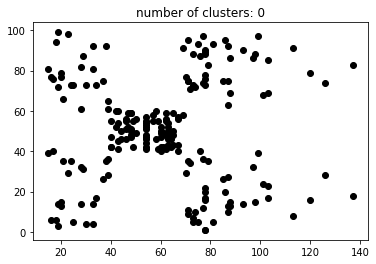

In [13]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

db =DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show()